In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import ttest_ind, shapiro, mannwhitneyu

In [2]:
data = pd.read_csv("csv/Results_Combined_07242024.csv")

### Statistics

Use a Shapiro-Wilk test to test for the normality:

In [3]:
#Check if normal distribution

input_columns = ["SAM_Total_Coarse%", "ImageJ_Total_Coarse%", "ImageJ_Manual_Total_Coarse%", 
                 "SAM_Void%", 'ImageJ_Void%', 'ImageJ_Manual_Void%',
                'SAM_NotVoid%', 'ImageJ_NotVoid%', 'ImageJ_Manual_NotVoid%']

for col in input_columns:
    result = shapiro(data[col])
    p = result.pvalue
    if p < 0.5:
        print(f'{col} is not normally distributed (p-value = {p})')
    elif p > 0.05:
        print(f'{col} is normally distributed (p-value = {p})')

SAM_Total_Coarse% is not normally distributed (p-value = 0.32236775755882263)
ImageJ_Total_Coarse% is not normally distributed (p-value = 0.46477964520454407)
ImageJ_Manual_Total_Coarse% is not normally distributed (p-value = 0.09782373160123825)
SAM_Void% is not normally distributed (p-value = 0.3634427785873413)
ImageJ_Void% is not normally distributed (p-value = 0.4207620322704315)
ImageJ_Manual_Void% is not normally distributed (p-value = 0.4207620322704315)
SAM_NotVoid% is not normally distributed (p-value = 0.25738194584846497)
ImageJ_NotVoid% is normally distributed (p-value = 0.7253061532974243)
ImageJ_Manual_NotVoid% is not normally distributed (p-value = 0.3044777512550354)


Conducting a paired T-Test shows that there is a statistically significant difference between SAM and thresholding when the threshold values are the same for all images. However, when the SAM results are compared to manual thresholding (i.e. adjusting the threshold to a different value for each image based on user input) the results are not different:

In [4]:
SAM_thresholding = ttest_ind(data['SAM_Total_Coarse%'], data['ImageJ_Total_Coarse%'])
SAM_manual_thresholding = ttest_ind(data['SAM_Total_Coarse%'], data['ImageJ_Manual_Total_Coarse%'])

print('T-Test Results (Coarse):\n')
print(f'SAM vs. Thresholding (batch)\n p-value: {SAM_thresholding[1]}\nSAM vs. Thresholding (manual)\n p-value: {SAM_manual_thresholding[1]}')

T-Test Results (Coarse):

SAM vs. Thresholding (batch)
 p-value: 0.00010672191964396559
SAM vs. Thresholding (manual)
 p-value: 0.45566237270109566


Dividing the results into voids and particles also gives similar results for SAM and manual thresholding:

In [5]:
voids_SAM_batch = ttest_ind(data['SAM_Void%'], data['ImageJ_Void%'])
voids_SAM_manual = ttest_ind(data['SAM_Void%'], data['ImageJ_Manual_Void%'])
particles_SAM_batch = ttest_ind(data['SAM_NotVoid%'], data['ImageJ_NotVoid%'])
particles_SAM_manual = ttest_ind(data['SAM_NotVoid%'], data['ImageJ_Manual_NotVoid%'])

print('T-Test Results (Void):\n')
print(f'SAM vs. Thresholding (batch)\n p-value: {voids_SAM_batch[1]}\nSAM vs. Thresholding (manual)\n p-value: {voids_SAM_manual[1]}\n')
print('T-Test Results (Particle):\n')
print(f'SAM vs. Thresholding (batch)\n p-value: {particles_SAM_batch[1]}\nSAM vs. Thresholding (manual)\n p-value: {particles_SAM_manual[1]}')

T-Test Results (Void):

SAM vs. Thresholding (batch)
 p-value: 0.07071430165498035
SAM vs. Thresholding (manual)
 p-value: 0.07071430165498035

T-Test Results (Particle):

SAM vs. Thresholding (batch)
 p-value: 0.0001451603177103951
SAM vs. Thresholding (manual)
 p-value: 0.8036569611129842


While t-tests should be robust to non-normality, we also conducted a Mann-Whitney U test. The results were the same:

In [6]:
SAM_thresholding = mannwhitneyu(data['SAM_Total_Coarse%'], data['ImageJ_Total_Coarse%'])
SAM_manual_thresholding = mannwhitneyu(data['SAM_Total_Coarse%'], data['ImageJ_Manual_Total_Coarse%'])
print('Mann-Whitney U Results (Coarse):\n')
print(f'SAM vs. Thresholding (batch)\n p-value: {SAM_thresholding[1]}\nSAM vs. Thresholding (manual)\n p-value: {SAM_manual_thresholding[1]}')

voids_SAM_batch = mannwhitneyu(data['SAM_Void%'], data['ImageJ_Void%'])
voids_SAM_manual = mannwhitneyu(data['SAM_Void%'], data['ImageJ_Manual_Void%'])
particles_SAM_batch = mannwhitneyu(data['SAM_NotVoid%'], data['ImageJ_NotVoid%'])
particles_SAM_manual = mannwhitneyu(data['SAM_NotVoid%'], data['ImageJ_Manual_NotVoid%'])
print('\nMann-Whitney U Results(Void):\n')
print(f'SAM vs. Thresholding (batch)\n p-value: {voids_SAM_batch[1]}\nSAM vs. Thresholding (manual)\n p-value: {voids_SAM_manual[1]}\n')
print('Mann-Whitney U Results (Particle):\n')
print(f'SAM vs. Thresholding (batch)\n p-value: {particles_SAM_batch[1]}\nSAM vs. Thresholding (manual)\n p-value: {particles_SAM_manual[1]}')

Mann-Whitney U Results (Coarse):

SAM vs. Thresholding (batch)
 p-value: 0.0007578810699193656
SAM vs. Thresholding (manual)
 p-value: 0.5249869101903615

Mann-Whitney U Results(Void):

SAM vs. Thresholding (batch)
 p-value: 0.03603961127766174
SAM vs. Thresholding (manual)
 p-value: 0.03603961127766174

Mann-Whitney U Results (Particle):

SAM vs. Thresholding (batch)
 p-value: 0.0007578810699193656
SAM vs. Thresholding (manual)
 p-value: 0.8392322130718609


### Results visualized

Comparing the total coarse % calculated for each image using SAM, automatic thresholding, and manual thresholding:

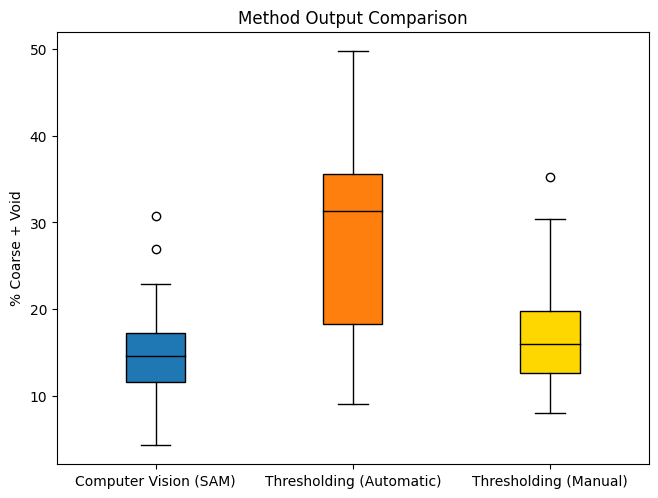

In [7]:
fig, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'gold']
bp = ax.boxplot([data["SAM_Total_Coarse%"], data["ImageJ_Total_Coarse%"], data["ImageJ_Manual_Total_Coarse%"]], patch_artist = True)
for median in bp['medians']:
    median.set(color ='black')
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
ax.set_xticklabels(["Computer Vision (SAM)", "Thresholding (Automatic)", "Thresholding (Manual)"])
ax.set_ylabel('% Coarse + Void')
ax.set_title('Method Output Comparison')
fig.tight_layout(pad=0.05)
fig.savefig('output_images/Boxplot_comparison.svg', dpi = 300, bbox_inches = 'tight')

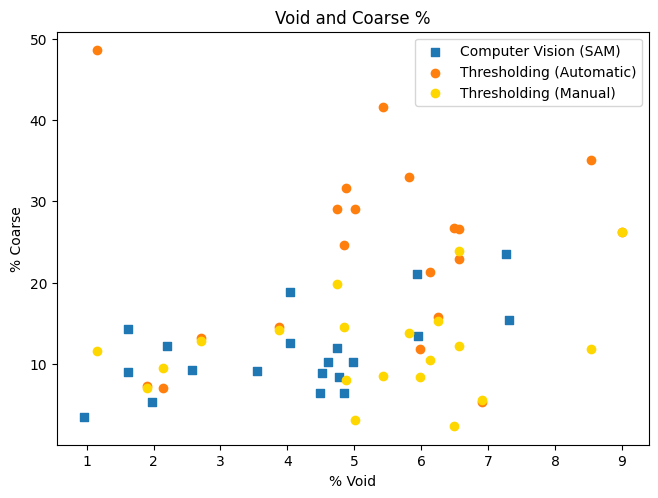

In [8]:
fig, ax = plt.subplots()
ax.scatter(data['SAM_Void%'], data['SAM_NotVoid%'], marker="s", label = 'Computer Vision (SAM)')
ax.scatter(data['ImageJ_Void%'], data['ImageJ_NotVoid%'], marker="o", label = 'Thresholding (Automatic)')
ax.scatter(data['ImageJ_Manual_Void%'], data['ImageJ_Manual_NotVoid%'], marker = 'o', c = 'gold', label = 'Thresholding (Manual)')
ax.set_xlabel('% Void')
ax.set_ylabel('% Coarse')
ax.legend()
ax.set_title('Void and Coarse %')
fig.tight_layout(pad=0.05)
fig.savefig('output_images/Scatterplot_comparison.svg', dpi = 300, bbox_inches = 'tight')